# ML Project: PR 101
### Authors: Mattia Palmiotto, Riccardo Petrella

#### List of used libraries and their versions:
    numpy: 1.21.5
    pandas: 1.4.4
    matplotlib: 3.6.2
    scikit-learn: 1.0.2
    seaborn:  0.12.2
    scipy: 1.9.3
    sklearn-genetic: 0.5.1

#### Procedure to install sklearn-genetic on Windows:

1) Find Anaconda3 (64 bit) on your computer
2) Open the Anaconda Prompt (anaconda3)
3) Digit: pip install sklearn-genetic
4) Press enter
5) Wait until the procedure is finished

#### Libraries used for the project:

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from scipy.io.arff import loadarff

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from genetic_selection import GeneticSelectionCV

Please use this code to avoid an obstructive Future-warning with "KNeighborsClassifier". There has been a compatibility problem with the "sklearn.neighbors" package. Everytime we run the code with it, the console was repeatedly clogged up with this warning message. 

In [2]:
def warn(*args, **kwargs):  
    pass

warnings.warn = warn

### Uploading the dataset "CM1".

The CM1 dataset is originally in the .arff format. It is a Tuple containing as the first item all the elements of the dataset and as the second item some information that are not directly related to our dataset.

In [3]:
DATA_PATH = r'C:\Users\..\data'

raw_data = loadarff(f'{DATA_PATH}/CM1.arff')
cm1_df = pd.DataFrame(raw_data[0])
cm1_df.shape

cm1_df.info

<bound method DataFrame.info of      LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0          2.0           3.0         0.0                   0.0           8.0   
1          3.0           3.0         0.0                   2.0           2.0   
2         38.0          35.0         4.0                   5.0          70.0   
3          1.0           7.0         5.0                   0.0          12.0   
4          9.0          15.0         4.0                  14.0          22.0   
..         ...           ...         ...                   ...           ...   
322       67.0          29.0        10.0                  27.0          41.0   
323        9.0           3.0         5.0                   0.0          12.0   
324        3.0           3.0         1.0                   1.0           2.0   
325        6.0           9.0         3.0                  10.0          22.0   
326        1.0           3.0         4.0                   0.0           0.0   

     CO

 ### Data exploration and pre-processing

First we verify whether there are null values or not in the dataset, then, we find both the categorical and numerical features.  
There are 37 numerical variables and only one categorical, which is also the target variable.  
The target variable is finally transformed into a binary variable.

In [4]:
cm1_df.isnull().sum().sum()

categorical = [i for i in cm1_df.columns if cm1_df[i].dtype == 'O']

print('There are {} categorical variables.'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical, '\n')

numerical = [i for i in cm1_df.columns if cm1_df[i].dtype in [
    'float64', 'int64']]

print('There are {} numerical variables.'.format(len(numerical)))

print('The numerical variables are: \n\n', numerical)


x = cm1_df.drop(['Defective'], axis=1)
y = cm1_df['Defective']

y = y.replace(b'N', 0)
y = y.replace(b'Y', 1)

There are 1 categorical variables.
The categorical variables are :

 ['Defective'] 

There are 37 numerical variables.
The numerical variables are: 

 ['LOC_BLANK', 'BRANCH_COUNT', 'CALL_PAIRS', 'LOC_CODE_AND_COMMENT', 'LOC_COMMENTS', 'CONDITION_COUNT', 'CYCLOMATIC_COMPLEXITY', 'CYCLOMATIC_DENSITY', 'DECISION_COUNT', 'DECISION_DENSITY', 'DESIGN_COMPLEXITY', 'DESIGN_DENSITY', 'EDGE_COUNT', 'ESSENTIAL_COMPLEXITY', 'ESSENTIAL_DENSITY', 'LOC_EXECUTABLE', 'PARAMETER_COUNT', 'HALSTEAD_CONTENT', 'HALSTEAD_DIFFICULTY', 'HALSTEAD_EFFORT', 'HALSTEAD_ERROR_EST', 'HALSTEAD_LENGTH', 'HALSTEAD_LEVEL', 'HALSTEAD_PROG_TIME', 'HALSTEAD_VOLUME', 'MAINTENANCE_SEVERITY', 'MODIFIED_CONDITION_COUNT', 'MULTIPLE_CONDITION_COUNT', 'NODE_COUNT', 'NORMALIZED_CYLOMATIC_COMPLEXITY', 'NUM_OPERANDS', 'NUM_OPERATORS', 'NUM_UNIQUE_OPERANDS', 'NUM_UNIQUE_OPERATORS', 'NUMBER_OF_LINES', 'PERCENT_COMMENTS', 'LOC_TOTAL']


#### Standardization and dataset split

Since the features have quite different scales, it is a good practice to standardize the data. Since the dataframe is turned into a numpy array, we transform it into with the apposite pandas function and we set the columns names. The procedure is as follows:

In [5]:
scaler = StandardScaler()

x = scaler.fit_transform(x)
x = pd.DataFrame(x, columns=numerical)

Now we split the design matrix and the target variable in two datasets with "train_test_split". The default option for the split gives 25 % of the observations to the test datasets.  
We have set "random_state=0" because we wanted the split to be always the same in order to yield the same results.

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=0)

#### Classifiers

  
Let us analyze all the classifiers used in the paper without feature selection. The classifiers are:
* Naive Bayes
* Decision Tree
* Logist Regression
* K nearest neighbours

The parameters used are chosen from the ones of the paper.  
**Important remark**: most of the parameters have been set to default because they were not specified in the paper research.
The procedure is done as follows:

##  Naive Bayes on CM1 - No features Selection

The first classifier is the Naive Bayes. We have used the Gaussian version because it is the one chosen by the researchers. After having given the classifier a short identifier, we fit it to the data and we compute the accuracy for both the training and the test datasets.  
The dataset is unfiltered.

In [7]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

tr_NB = gnb.score(X_train, Y_train)

accuracy_NB = gnb.score(X_test, Y_test)


Y_pred_NB = gnb.predict(X_test)

We repeat the same procedure for the other classifiers.

## Decision Tree on CM1 - No features Selection

In [8]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

tr_DT = dt.score(X_train, Y_train)

accuracy_DT = dt.score(X_test, Y_test)

Y_pred_DC = dt.predict(X_test)

## Logistic Regression on CM1 - No features Selection

In [9]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

tr_LR = lr.score(X_train, Y_train)

accuracy_LR = lr.score(X_test, Y_test)

Y_pred_LR = lr.predict(X_test)

## KNN on CM1 - No FS

In [10]:
knn = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
knn.fit(X_train, Y_train)

tr_KNN = knn.score(X_train, Y_train)

accuracy_KNN = knn.score(X_test, Y_test)

Y_pred_KNN = knn.predict(X_test)

We group all the training and test scores (i.e. accuracies) in two lists.  
We do not show the accuracies yet, because they will be grouped togheter and graphically analysed further.

In [11]:
tr_NoFS = [tr_NB, tr_DT, tr_LR, tr_KNN]  
accuracies_NoFS = [accuracy_NB, accuracy_DT, accuracy_LR, accuracy_KNN] 

# 

# MC1: Methods of Feature selection (FS)

In this paper, different categories of FS have been used. For our project, we decided to use a method for each category. 

## FS made with Filter Feature Ranking (FFR) - Information Gain (IG)

The first used method is the Information Gain, computed with SelectKBest. The number of selected features (k) is set to 6 as done in the paper. Since the application of the above function turns the date into a numpy array, We have created a procedure with a for-loop to apply the columns names to our selected features.  
After that, we have created the new filterd dataframe.

In [12]:
IG = SelectKBest(mutual_info_classif, k=6) 
X_IG_train = IG.fit_transform(X_train, Y_train)

IG_columns = []
numerical_lists = {col: list(X_train[col]) for col in numerical}

for i in range(6):
    list_i = list(X_IG_train[:, i])
    for col in numerical:
        if list_i == numerical_lists[col]:
            IG_columns.append(col)
            break

X_IG_train = pd.DataFrame(X_IG_train, columns=IG_columns)

X_IG_test = X_test[IG_columns]

We define the function which compute the variation in the accuracies with/without feature selection. "first_value" stands for the accuracies without feature selection. "second_value" stands for the accuracies with FS. The result is expressed as a percentage.

In [13]:
def variation(first_value, second_value):
    return ((second_value - first_value) / first_value) * 100

We have repeated the same code as above with the filtered data with Information Gain.  
The only difference is that the variation of accuracies with respect to the unfiltered data has been added for each classifier.

### FFR: IG + Naive Bayes

In [14]:
gnb.fit(X_IG_train, Y_train)

tr_IG_NB = gnb.score(X_IG_train, Y_train)

accuracy_IG_NB = gnb.score(X_IG_test, Y_test)

Y_IG_pred_NB = gnb.predict(X_IG_test)

variation_IG_NB = variation(accuracy_NB, accuracy_IG_NB)

### FFR: IG + Decision Tree

**Remark**. For some the Decision Tree, different iterations have resulted in different values of accuracies. Therefore, we decided to iterate these prediction models with for loops and take the mean of scores as result.

In [15]:
train_scores_IG_DT = []
accuracies_IG_DT = []

for i in range(50):

    dt.fit(X_IG_train, Y_train)

    train_scores_IG_DT.append(dt.score(X_IG_train, Y_train))

    accuracies_IG_DT.append(dt.score(X_IG_test, Y_test))

    Y_IG_pred_DC = dt.predict(X_IG_test)

tr_IG_DT = np.mean(train_scores_IG_DT)
accuracy_IG_DT = np.mean(accuracies_IG_DT)
variation_IG_DT = variation(accuracy_DT, accuracy_IG_DT)

### FFR: IG + Logistic Regression

In [16]:
lr.fit(X_IG_train, Y_train)

tr_IG_LR = lr.score(X_IG_train, Y_train)

accuracy_IG_LR = lr.score(X_IG_test, Y_test)

Y_IG_pred_LR = lr.predict(X_IG_test)

variation_IG_LR = variation(accuracy_LR, accuracy_IG_LR)

### FFR:  IG + KNN

In [17]:
knn.fit(X_IG_train, Y_train)

tr_IG_KNN = knn.score(X_IG_train, Y_train)

accuracy_IG_KNN = knn.score(X_IG_test, Y_test)

Y_IG_pred_KNN = knn.predict(X_IG_test)

variation_IG_KNN = variation(accuracy_KNN, accuracy_IG_KNN)

As previously done, we have created two lists to group the scores.

In [18]:
tr_IG = [tr_IG_NB, tr_IG_DT, tr_IG_LR, tr_IG_KNN]
accuracies_IG = [accuracy_IG_NB, accuracy_IG_DT,accuracy_IG_LR, accuracy_IG_KNN]


### Example of Confusion Matrix for Data after FS with IG (Naive Bayes)

Here is an example to graphically show the the components of the accuracy for a classifier, with filtered data.

Confusion matrix

 [[70  4]
 [ 5  3]]

True Negatives(TN) =  70

True Positives(TP) =  3

False Negatives(FP) =  4

False Positives(FN) =  5


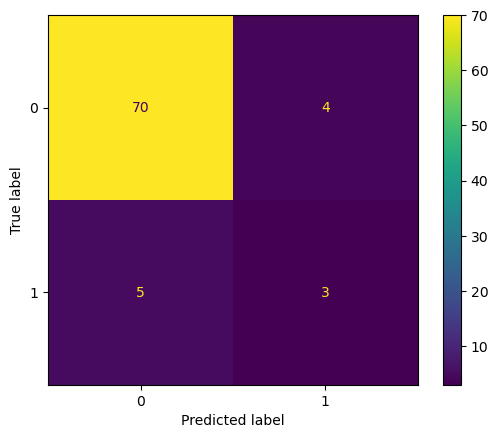

In [19]:
cm = confusion_matrix(Y_test, Y_IG_pred_NB)

print('Confusion matrix\n\n', cm)
print('\nTrue Negatives(TN) = ', cm[0,0])
print('\nTrue Positives(TP) = ', cm[1,1])
print('\nFalse Negatives(FP) = ', cm[0,1])
print('\nFalse Positives(FN) = ', cm[1,0])

cm_display=ConfusionMatrixDisplay(cm)
cm_display.plot()

# 

## FS made with Feature Subest Selection (FSS) - SELECTION BASED ON CORRELATION (CFS)

 Most of the variables are highly correlated. Thus, many of them are redundant and it is useful to eliminate some of them in order to improve the accuracy of our models and to prevent overfitting. This procedure of FS is called Correlation Feature Selection (CFS).

<AxesSubplot: >

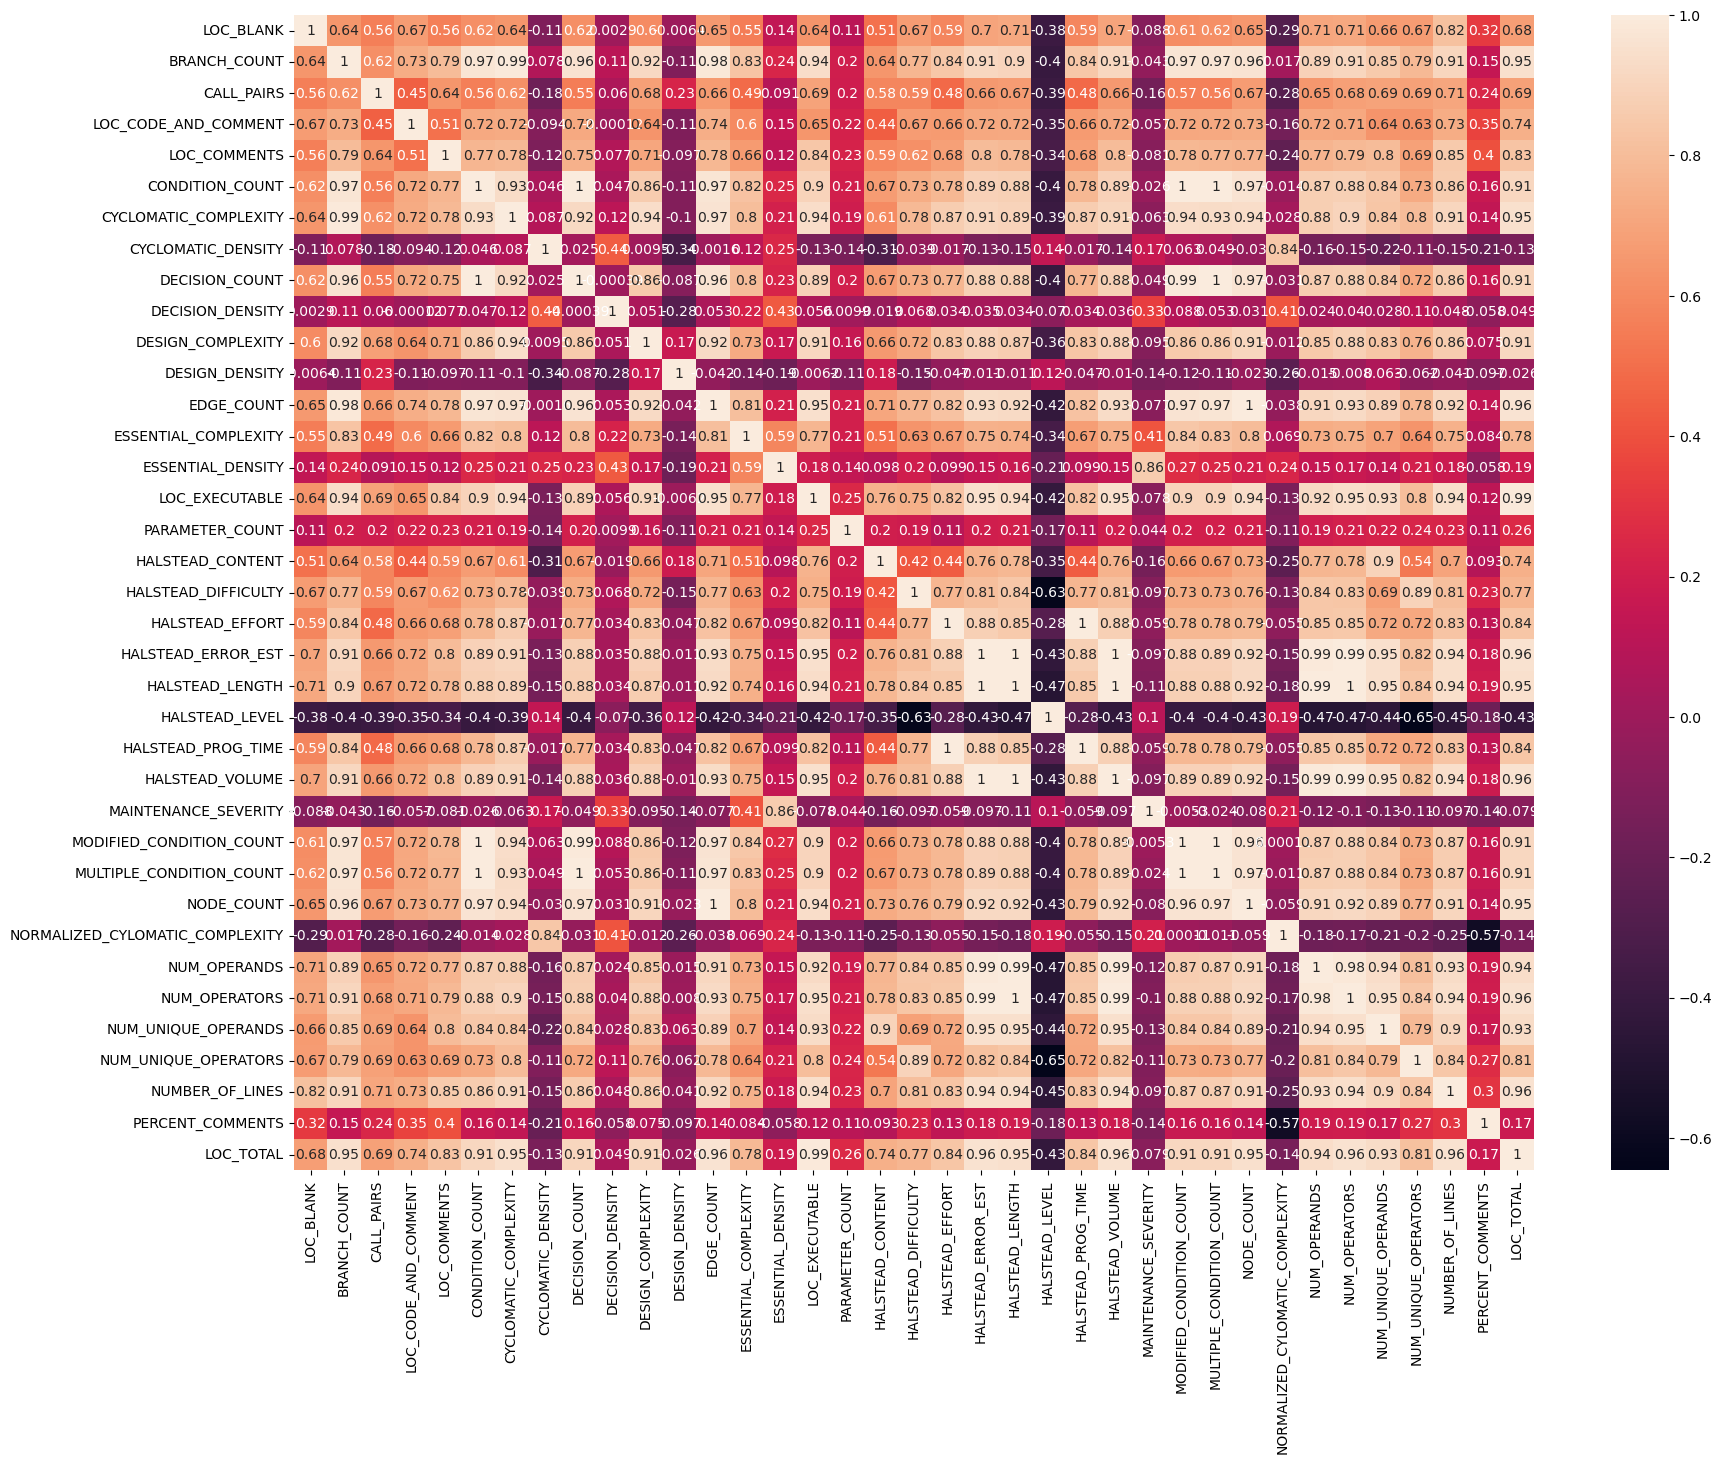

In [20]:
corr = x.corr() 
corr.head()

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True)

Definition of a function to select features based on the coefficient of correlation. The variables with a coefficient  bigger or smaller than $|0.75|$ are excluded.

In [21]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                break
    return col_corr


corr_features = correlation(x, 0.75)

Let us show the name and the amount of selected features with correlation.  
From the original X_train and X_test, we have dropped the correlated features.

In [22]:
print("Number of correlated features:", len(corr_features))
print("\nName of correlated features:", corr_features)

X_train_noncorr = X_train.drop(corr_features, axis=1)  
X_test_noncorr = X_test.drop(corr_features, axis=1)

print("\nNumber of remaining features:", X_train_noncorr.shape[1])

X_noncorr = pd.concat([X_train_noncorr, X_test_noncorr], axis=0)

print("\nName of non correlated features:", X_train_noncorr.columns)

Number of correlated features: 26

Name of correlated features: {'LOC_TOTAL', 'CYCLOMATIC_COMPLEXITY', 'EDGE_COUNT', 'NUM_UNIQUE_OPERANDS', 'NUMBER_OF_LINES', 'LOC_COMMENTS', 'HALSTEAD_LENGTH', 'DECISION_COUNT', 'MODIFIED_CONDITION_COUNT', 'HALSTEAD_VOLUME', 'MULTIPLE_CONDITION_COUNT', 'HALSTEAD_CONTENT', 'DESIGN_COMPLEXITY', 'NUM_OPERANDS', 'CONDITION_COUNT', 'HALSTEAD_ERROR_EST', 'HALSTEAD_DIFFICULTY', 'HALSTEAD_PROG_TIME', 'NUM_UNIQUE_OPERATORS', 'LOC_EXECUTABLE', 'NODE_COUNT', 'MAINTENANCE_SEVERITY', 'HALSTEAD_EFFORT', 'ESSENTIAL_COMPLEXITY', 'NUM_OPERATORS', 'NORMALIZED_CYLOMATIC_COMPLEXITY'}

Number of remaining features: 11

Name of non correlated features: Index(['LOC_BLANK', 'BRANCH_COUNT', 'CALL_PAIRS', 'LOC_CODE_AND_COMMENT',
       'CYCLOMATIC_DENSITY', 'DECISION_DENSITY', 'DESIGN_DENSITY',
       'ESSENTIAL_DENSITY', 'PARAMETER_COUNT', 'HALSTEAD_LEVEL',
       'PERCENT_COMMENTS'],
      dtype='object')


# 

## Implementation of the Genetic Selection algorithm (GS)

The Genetic Selection has been implemented as a chosen example for FSS, precisely CFS + heuristic search.  
We have choosen it because in the research, the best results in terms of accuracy have been obtained with this algorithm.  
The algorithm has been computed with GeneticSelectionCV and its parameters have been copied from the paper.  
**Remark**: the number of generations should be equal to 20, however that setting is too computationally demanding and the results usually converged in the first five generations. Because of that, we decided to set it to 5.   

**Remark**: with the Genetic Selection, the accuracies for both the training and the test varied at each iteration in three of the four classifiers (DT, LR, KNN). Thus, we have implemented a for loop with 4 iterations to get the accuracies four times to compute their mean.  
Then, we computed the variations as we did with the IG. 

### FSS: NB + CFS + GS

In [23]:
GS_gnb = GeneticSelectionCV(estimator=gnb, n_population=200, n_generations=5,
                            crossover_proba=0.6)

GS_gnb.fit(X_train_noncorr, Y_train)

tr_GS_NB = GS_gnb.score(X_train_noncorr, Y_train)

accuracy_GS_NB = GS_gnb.score(X_test_noncorr, Y_test)
variation_GS_NB = variation(accuracy_NB, accuracy_GS_NB)    

### FSS: DT + CFS + GS

In [24]:
GS_dt = GeneticSelectionCV(estimator=dt, n_population=200, n_generations=5,
                           crossover_proba=0.6)

accuracies_GS_DT = []
training_scores_GS_DT = []

for i in range(4):
    GS_dt.fit(X_train_noncorr, Y_train)
    training_scores_GS_DT.append(GS_dt.score(X_train_noncorr, Y_train))
    accuracies_GS_DT.append(GS_dt.score(X_test_noncorr, Y_test))

tr_GS_DT = np.mean(training_scores_GS_DT)
accuracy_GS_DT = np.mean(accuracies_GS_DT)
variation_GS_DT = variation(accuracy_DT, accuracy_GS_DT)


### FSS: LOG REG + CFS + GS

In [25]:
GS_lr = GeneticSelectionCV(estimator=lr, n_population=200, n_generations=5,
                           crossover_proba=0.6)

accuracies_GS_LR = []
training_scores_GS_LR = []

for i in range(4):
    GS_lr.fit(X_train_noncorr, Y_train)
    training_scores_GS_LR.append(GS_lr.score(X_train_noncorr, Y_train))
    accuracies_GS_LR.append(GS_lr.score(X_test_noncorr, Y_test))

tr_GS_LR = np.mean(training_scores_GS_LR)
accuracy_GS_LR = np.mean(accuracies_GS_LR)
variation_GS_LR = variation(accuracy_LR, accuracy_GS_LR)

### FSS: KNN + CFS + GS

In [26]:
GS_knn = GeneticSelectionCV(estimator=knn, n_population=200, n_generations=5,
                            crossover_proba=0.6)

accuracies_GS_KNN = []
training_scores_GS_KNN = []

for i in range(4):
    GS_knn.fit(X_train_noncorr, Y_train)
    training_scores_GS_KNN.append(GS_knn.score(X_train_noncorr, Y_train))
    accuracies_GS_KNN.append(GS_knn.score(X_test_noncorr, Y_test))

tr_GS_KNN = np.mean(training_scores_GS_KNN)
accuracy_GS_KNN = np.mean(accuracies_GS_KNN)
variation_GS_KNN = variation(accuracy_KNN, accuracy_GS_KNN)

Once again, we list together the accuracies of training and test.

In [27]:
tr_GS = [tr_GS_NB, tr_GS_DT, tr_GS_LR, tr_GS_KNN]
accuracies_GS = [accuracy_GS_NB, accuracy_GS_DT,accuracy_GS_LR, accuracy_GS_KNN]

## Dataframes with accuracies and variations in the CM1 dataset

All the training, test scores and variations without FS, with IG and with CFS+GS are grouped together by classifiers in three dictionaries as shown below.  The dictionaries are eventually transformed into dataframes and saved in a folder named "results" with the .csv format.

In [28]:
acc_ind = ['No FS', 'IG (FRR)', 'GS (FSS)']

tr_table = {
    'NB': pd.Series([tr_NB, tr_IG_NB, tr_GS_NB], index=acc_ind),
    'DT': pd.Series([tr_DT, tr_IG_DT, tr_GS_DT], index=acc_ind),
    'LR': pd.Series([tr_LR, tr_IG_LR, tr_GS_LR], index=acc_ind),
    'KNN': pd.Series([tr_KNN, tr_IG_KNN, tr_GS_KNN], index=acc_ind)
}

tr_table = pd.DataFrame(tr_table)
tr_table = tr_table*100
print("Training scores:\n", tr_table)



accuracies_CM1 = {
    'NB': pd.Series([accuracy_NB, accuracy_IG_NB, accuracy_GS_NB], index=acc_ind),
    'DT': pd.Series([accuracy_DT, accuracy_IG_DT, accuracy_GS_DT], index=acc_ind),
    'LR': pd.Series([accuracy_LR, accuracy_IG_LR, accuracy_GS_LR], index=acc_ind),
    'KNN': pd.Series([accuracy_KNN, accuracy_IG_KNN, accuracy_GS_KNN], index=acc_ind)
}

accuracies_CM1 = pd.DataFrame(accuracies_CM1)
accuracies_CM1 = accuracies_CM1*100

RESULTS_PATH = r'C:\Users\..\results'

accuracies_CM1.to_csv(f'{RESULTS_PATH}/accuracies_cm1.csv')

print("\nAccuracy scores:\n", accuracies_CM1)

variations_CM1 = {
    'NB': pd.Series([0, variation_IG_NB, variation_GS_NB], index=acc_ind),
    'DT': pd.Series([0, variation_IG_DT, variation_GS_DT], index=acc_ind),
    'LR': pd.Series([0, variation_IG_LR, variation_GS_LR], index=acc_ind),
    'KNN': pd.Series([0, variation_IG_KNN, variation_GS_KNN], index=acc_ind)
}

variations_CM1 = pd.DataFrame(variations_CM1)

variations_CM1.to_csv(f'{RESULTS_PATH}/variations_cm1.csv')

print("\nVariations:\n", variations_CM1)

Training scores:
                  NB          DT         LR    KNN
No FS     80.816327  100.000000  87.755102  100.0
IG (FRR)  82.040816  100.000000  86.530612  100.0
GS (FSS)  86.122449   88.265306  86.938776  100.0

Accuracy scores:
                  NB         DT         LR        KNN
No FS     86.585366  82.926829  89.024390  85.365854
IG (FRR)  89.024390  81.560976  90.243902  75.609756
GS (FSS)  90.243902  89.329268  90.243902  86.280488

Variations:
                 NB        DT        LR        KNN
No FS     0.000000  0.000000  0.000000   0.000000
IG (FRR)  2.816901 -1.647059  1.369863 -11.428571
GS (FSS)  4.225352  7.720588  1.369863   1.071429


### Loading the results from the other datasets

We have used the same code up to this point for the other datasets, then we have saved their results in the same folder.
Now we import them as csv files in order to make some interesting comparisions between the datasets.

In [29]:
accuracies_KC1 = pd.read_csv(f"{RESULTS_PATH}/accuracies_KC1.csv", index_col=0)
accuracies_KC3 = pd.read_csv(f"{RESULTS_PATH}/accuracies_KC3.csv", index_col=0)
accuracies_MW1 = pd.read_csv(f"{RESULTS_PATH}/accuracies_MW1.csv", index_col=0)
accuracies_PC2 = pd.read_csv(f"{RESULTS_PATH}/accuracies_PC2.csv", index_col=0)
variations_KC1 = pd.read_csv(f"{RESULTS_PATH}/variations_KC1.csv", index_col=0)
variations_KC3 = pd.read_csv(f"{RESULTS_PATH}/variations_KC3.csv", index_col=0)
variations_MW1 = pd.read_csv(f"{RESULTS_PATH}/variations_MW1.csv", index_col=0)
variations_PC2 = pd.read_csv(f"{RESULTS_PATH}/variations_PC2.csv", index_col=0)

## Graphic comparisions of accuracies and variations of all prediction models within each dataset 

First we create two lists containing the dataframes of accuracies and variations of each dataset. Then, we define a list of strings which indicate the datasets names as strings and another lists which indicates the classifiers.

After that, we create a for-loop with five iterations (i.e. the number of datasets) to print the plots. 
5 plots are returned containing three lines each (i.e. No FS, IG (FRR), GS (FSS)) with the measured accuracies for each dataset.

With the same procedure other 5 plots are returned with two lines each to show the variations of accuracies with respect to no FS for each dataset.

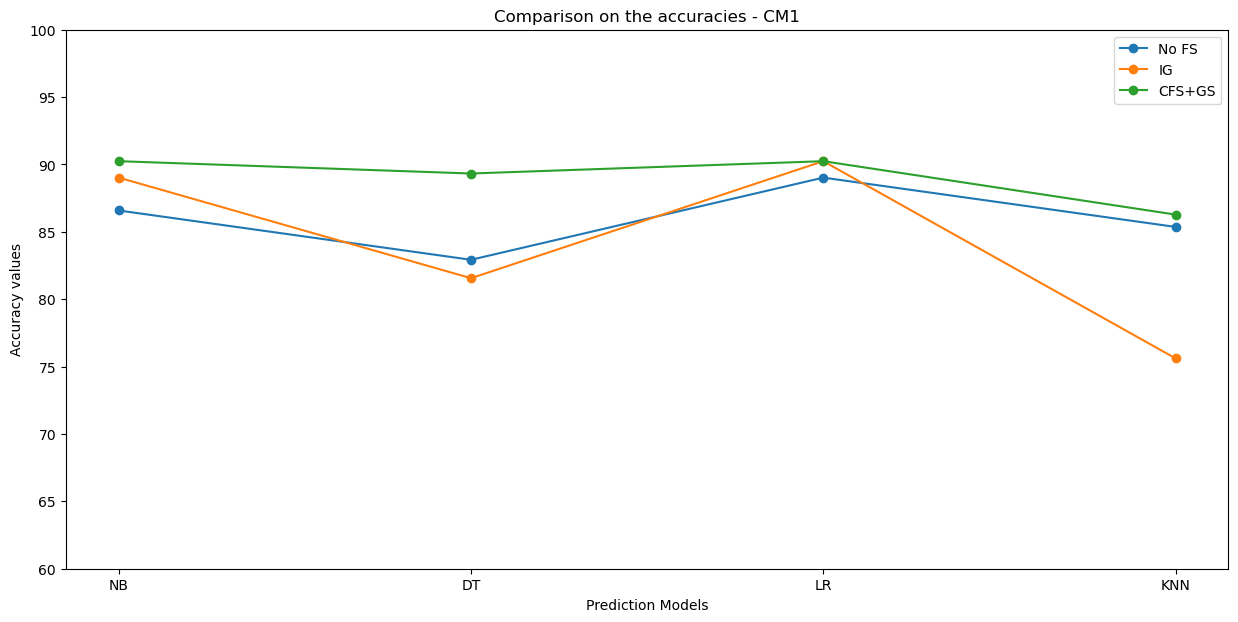

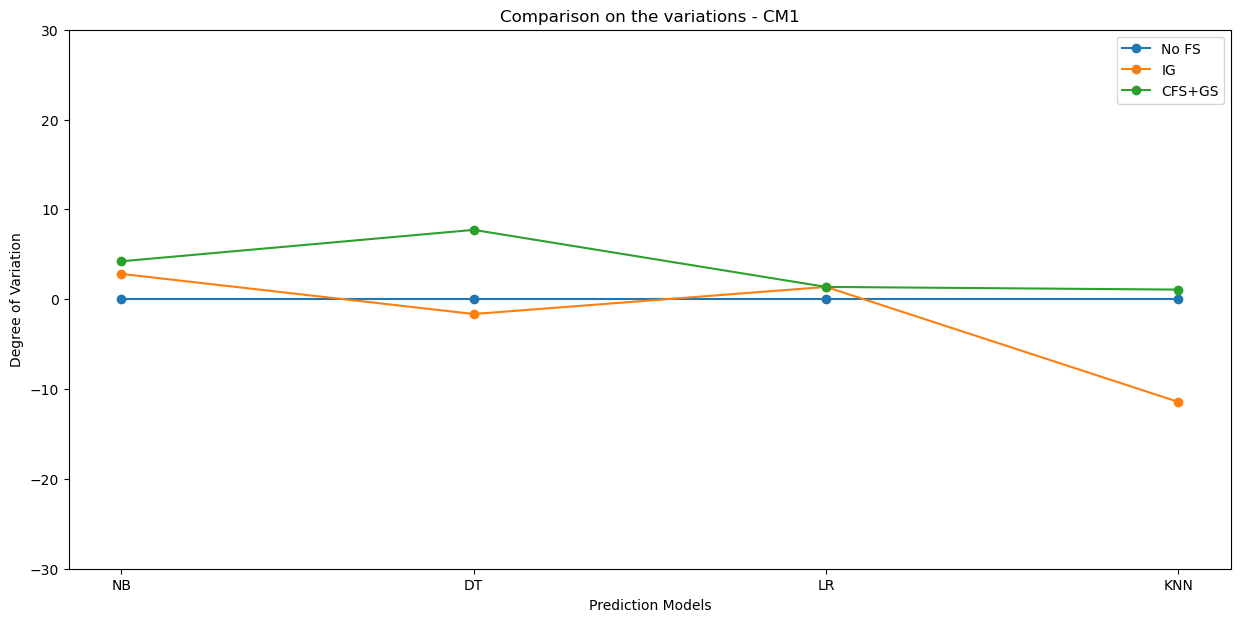

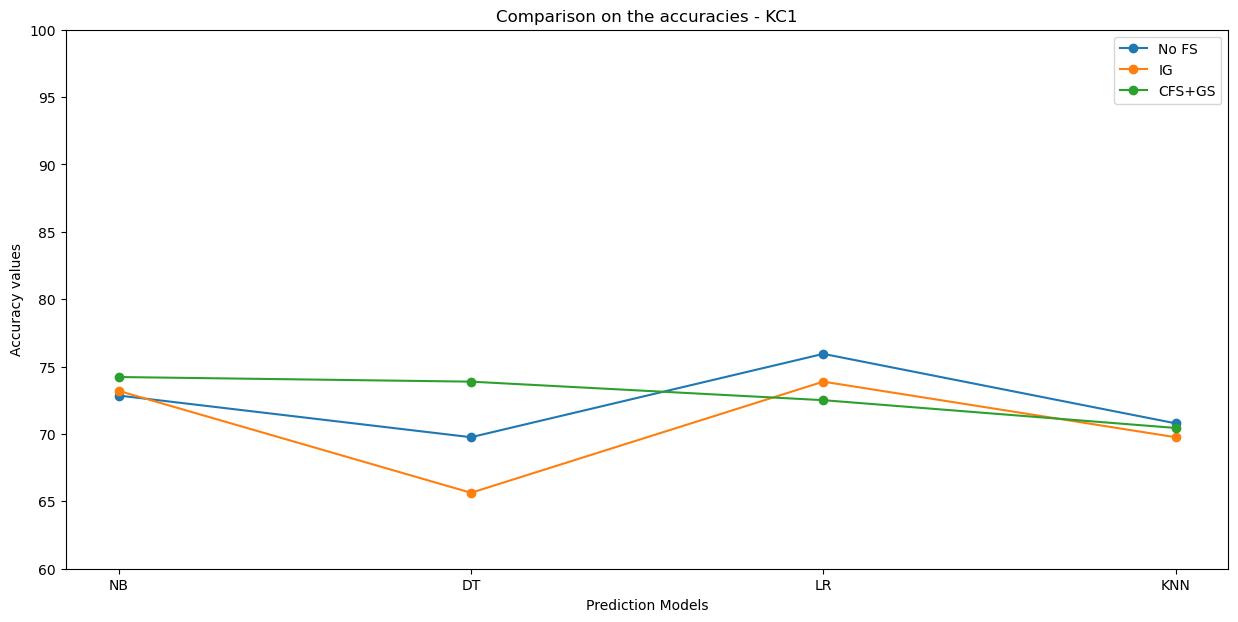

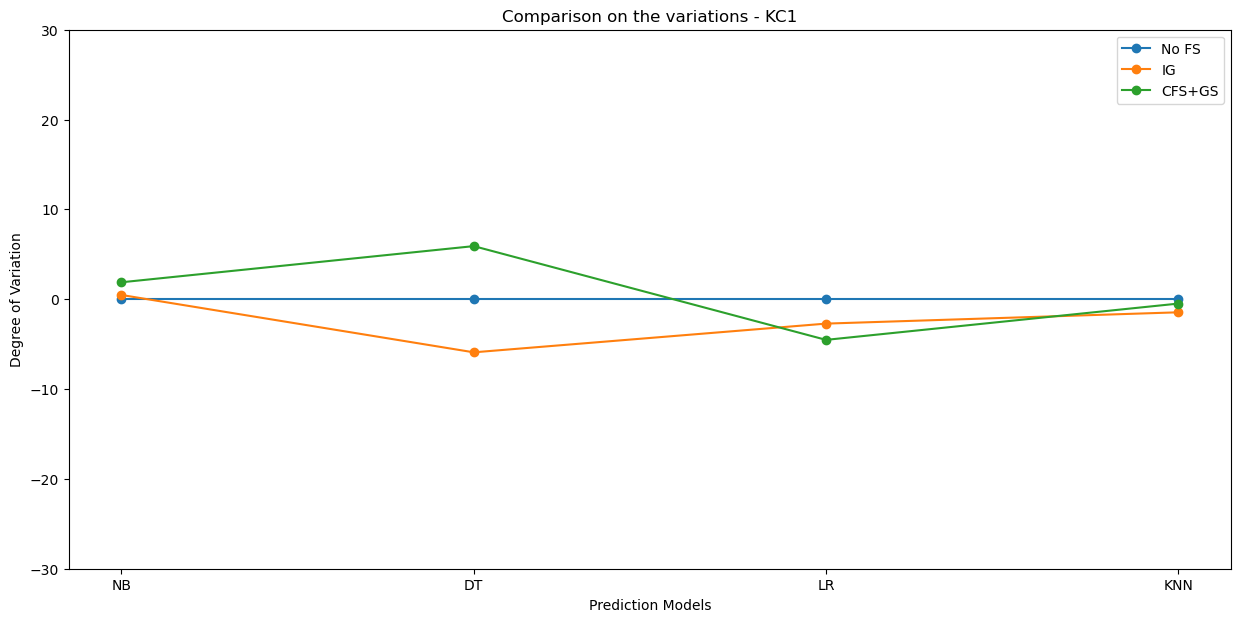

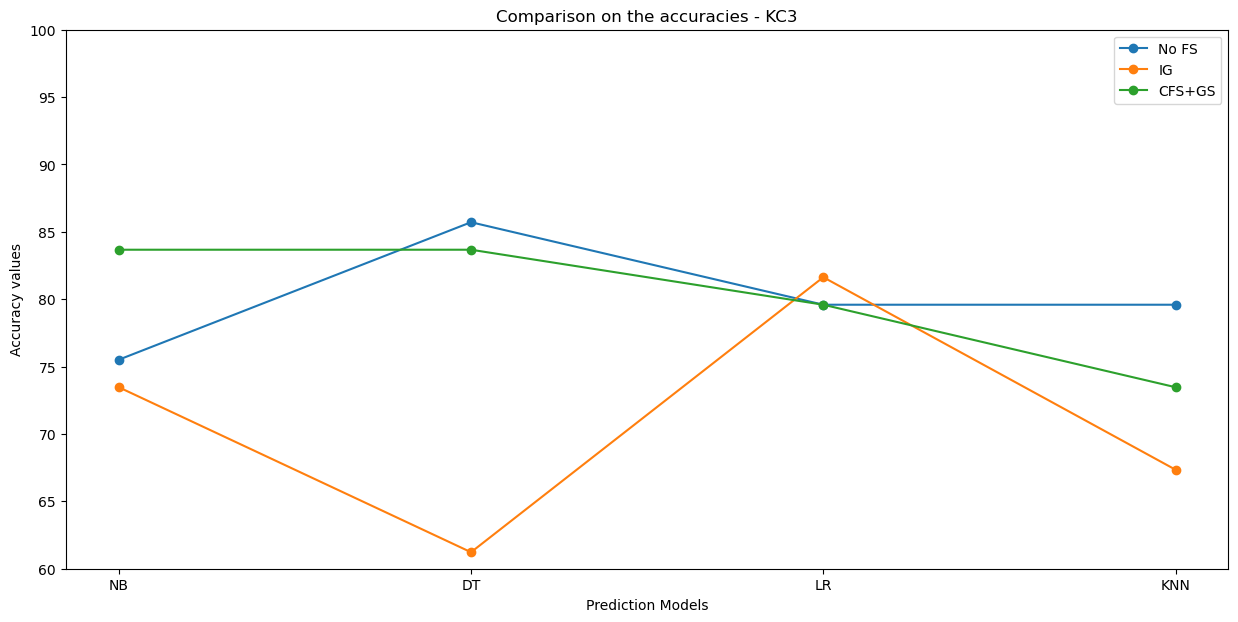

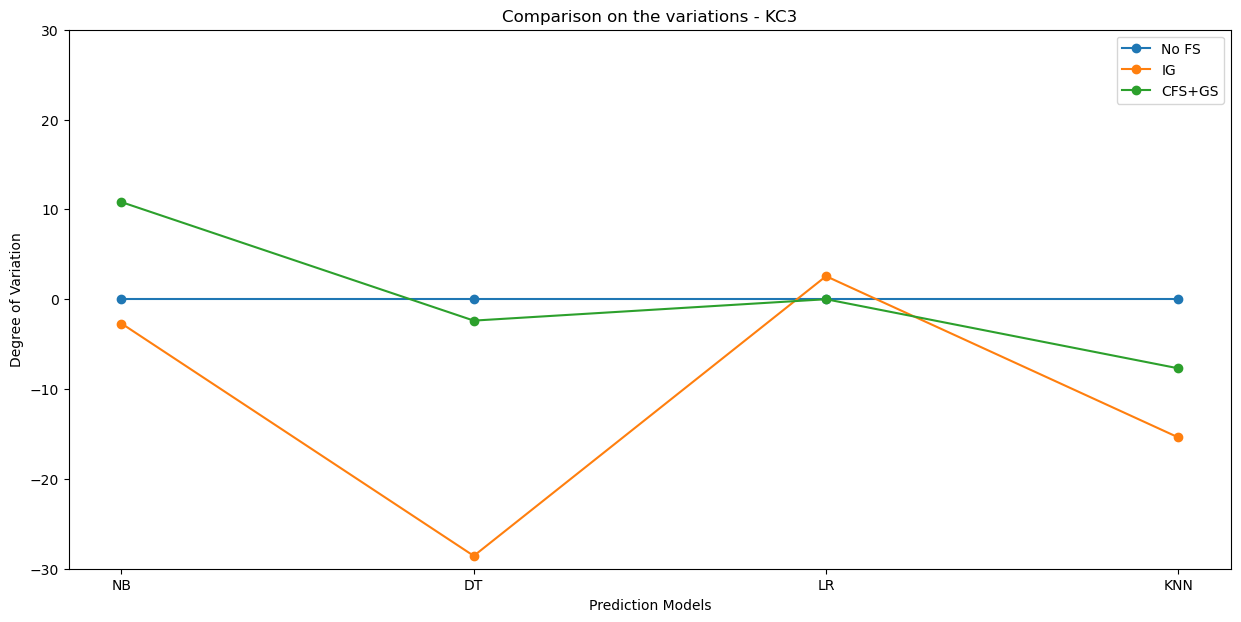

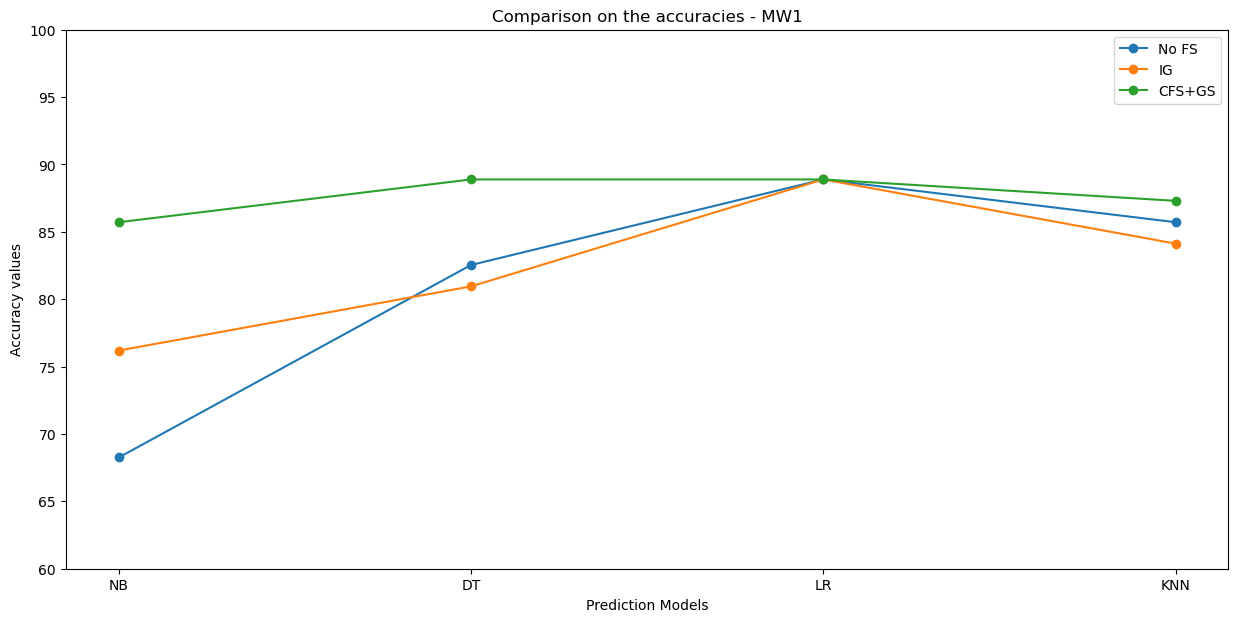

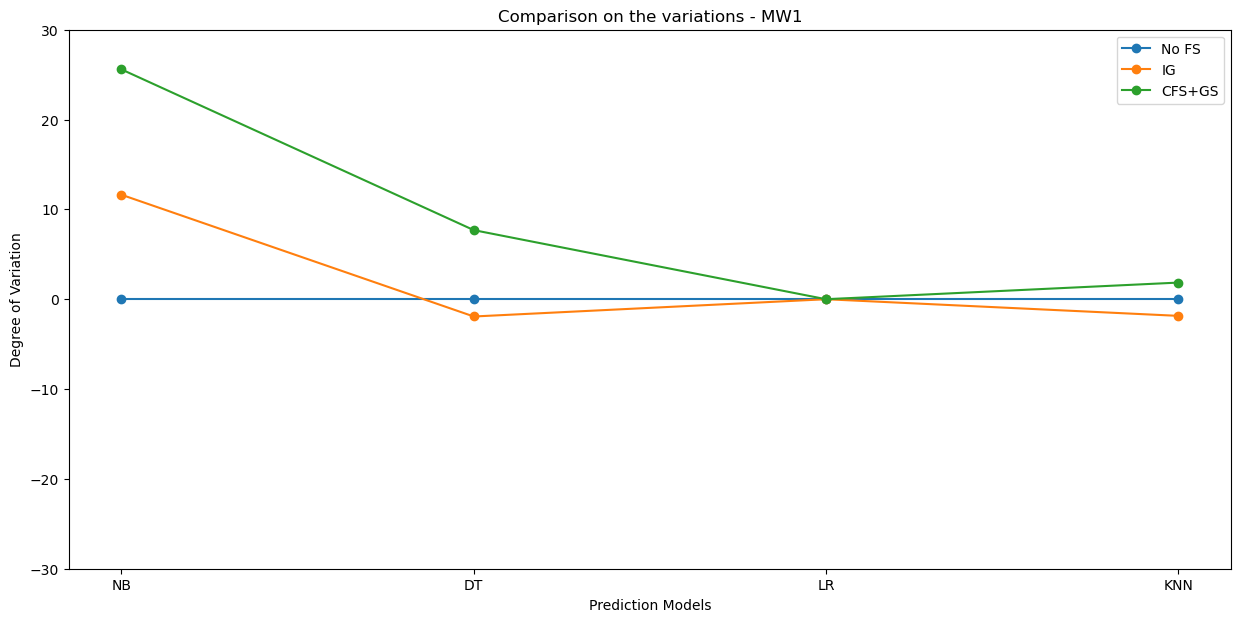

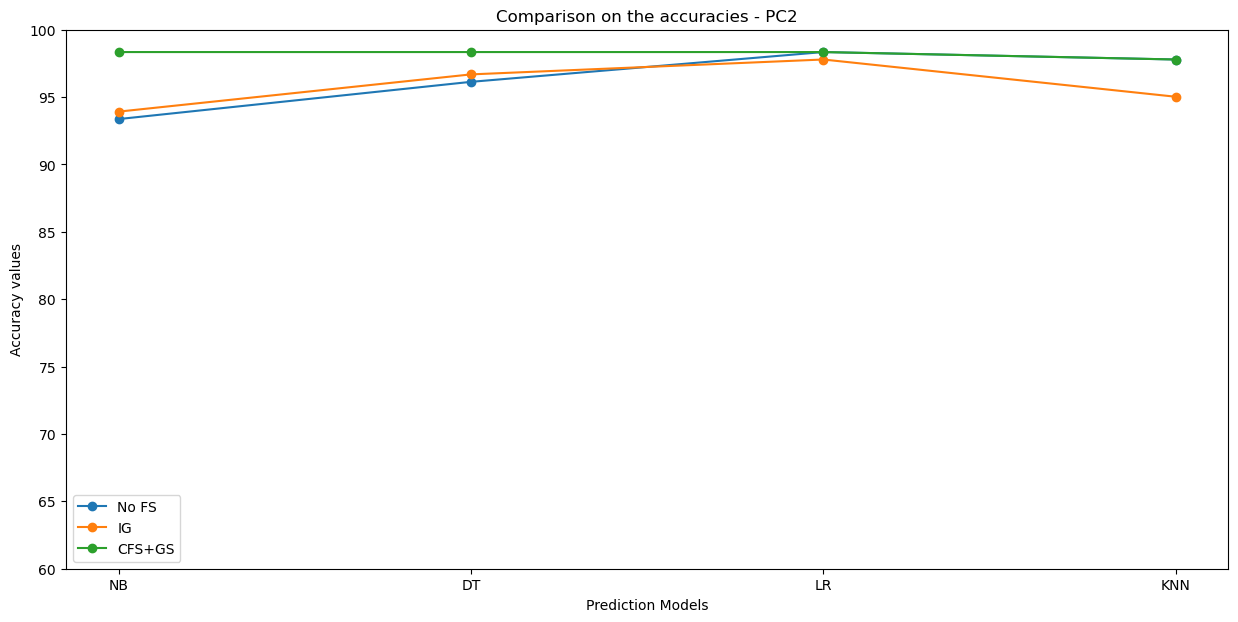

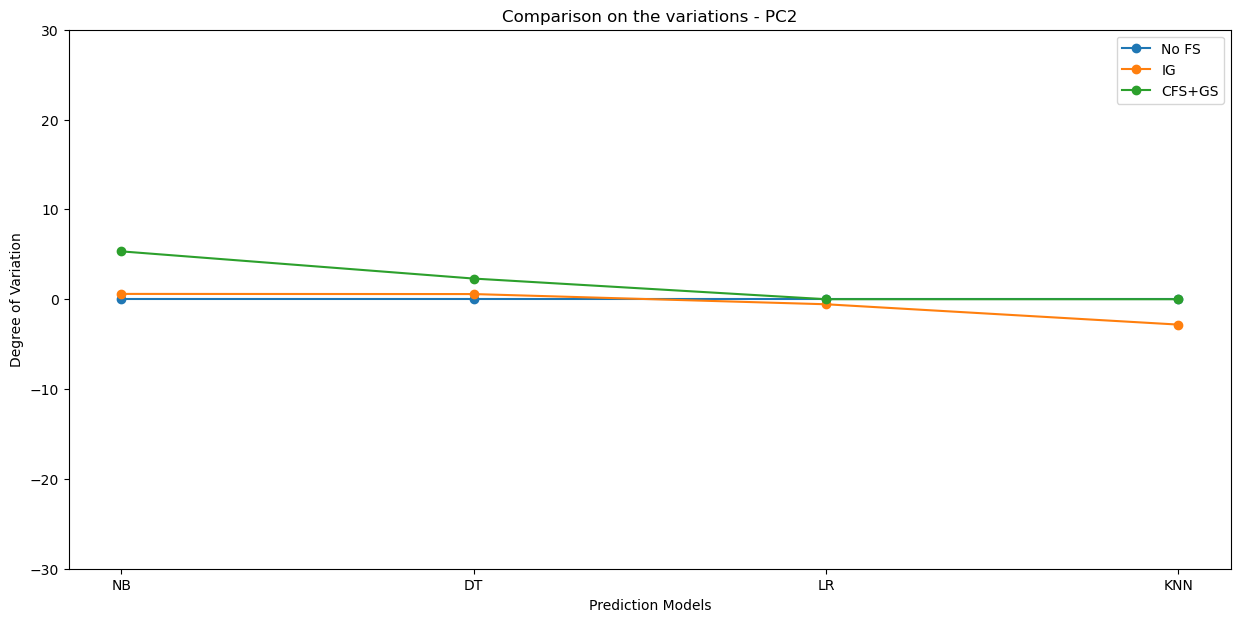

In [30]:
accuracies_list = [accuracies_CM1, accuracies_KC1,accuracies_KC3, accuracies_MW1, accuracies_PC2]
variations_list = [variations_CM1, variations_KC1,variations_KC3, variations_MW1, variations_PC2]

datasets = ['CM1', 'KC1', 'KC3', 'MW1', 'PC2']

classifiers = ['NB', 'DT', 'LR', 'KNN']
for i in range(5):

    accuracies_table = accuracies_list[i]
    accuracies_NoFS = accuracies_table.loc['No FS']
    accuracies_IG = accuracies_table.loc['IG (FRR)']
    accuracies_GS = accuracies_table.loc['GS (FSS)']

    variations_table = variations_list[i]
    variations_IG = variations_table.loc['IG (FRR)']
    variations_GS = variations_table.loc['GS (FSS)']

    acc_plot = plt.plot
    plt.figure(figsize=(15, 7))
    acc_plot(classifiers, accuracies_NoFS, label="No FS", linestyle="-", marker='o')
    acc_plot(classifiers, accuracies_IG, label="IG", linestyle="-", marker='o')
    acc_plot(classifiers, accuracies_GS, label="CFS+GS", linestyle="-", marker='o')

    plt.legend()

    plt.xlabel('Prediction Models')
    plt.ylabel('Accuracy values')
    plt.ylim(60, 100)
    plt.title('Comparison on the accuracies - ' + datasets[i])
    plt.show()

    vrt_plot = plt.plot
    plt.figure(figsize=(15, 7))
    vrt_plot(classifiers, [0, 0, 0, 0], label="No FS", linestyle="-", marker='o')
    vrt_plot(classifiers, variations_IG, label="IG", linestyle="-", marker='o')
    vrt_plot(classifiers, variations_GS, label="CFS+GS", linestyle="-", marker='o')
    plt.legend()

    plt.xlabel('Prediction Models')
    plt.ylabel('Degree of Variation')
    plt.ylim(-30, 30)
    plt.title('Comparison on the variations - ' + datasets[i])
    plt.show()

### Average variations across the five datasets

In the cell below, we have computed the variations of all datasets for both the IG and GS methods. The dictionary named "average_variations" with classifiers as the keyes and with an empty dictionary as values is filled with the average variations for both the types of FS and then it is turned into a pandas dataframe and saved in the same folder containing all the results.

In [31]:
average_variations = {c: {} for c in classifiers}
for c in classifiers:

    
    var_ig = [variations_list[i][c][1] for i in range(5)]
    var_gs = [variations_list[i][c][2] for i in range(5)]


    av_var_ig = np.mean(var_ig)
    av_var_gs = np.mean(var_gs)

    average_variations[c] = {'IG': av_var_ig, 'CFS+GS': av_var_gs}
    
average_variations = pd.DataFrame(average_variations)
average_variations.to_csv(f'{RESULTS_PATH}/average_variations.csv')

average_variations

,NB,DT,LR,KNN
IG,2.561104,-7.495636,0.131447,-6.589242
CFS+GS,9.565959,4.248425,-0.631005,-1.050893


### Average accuracies and standard deviations across the five datasets

We compute with the same procedure of the above cell, the average accuracies and the standard deviations of all datasets.  
The standard deviation is not directly part of the results of the paper but it is necessary for the successive computation of the coefficient of variations.

In [32]:
standard_deviations = {c: {} for c in classifiers}
average_accuracies = {c: {} for c in classifiers}
for c in classifiers:

    acc_nofs = [accuracies_list[i][c][0] for i in range(5)]
    acc_ig = [accuracies_list[i][c][1] for i in range(5)]
    acc_gs = [accuracies_list[i][c][2] for i in range(5)]

    sd_acc_nofs = np.std(acc_nofs)
    sd_acc_ig = np.std(acc_ig)
    sd_acc_gs = np.std(acc_gs)
    
    standard_deviations[c] = {'No FS': sd_acc_nofs,'IG': sd_acc_ig, 'CFS+GS': sd_acc_gs}

    av_acc_nofs = np.mean(acc_nofs)
    av_acc_ig = np.mean(acc_ig)
    av_acc_gs = np.mean(acc_gs)

    average_accuracies[c] = {'No FS': av_acc_nofs,'IG': av_acc_ig, 'CFS+GS': av_acc_gs}

average_accuracies = pd.DataFrame(average_accuracies)
average_accuracies.to_csv(f'{RESULTS_PATH}/average_accuracies.csv')

standard_deviations = pd.DataFrame(standard_deviations)
standard_deviations.to_csv(f'{RESULTS_PATH}/standard_deviations.csv')

### Bar plot of Average Accuracies

We have showed the average accuracies of all datasets with a bar plot. The columns are the four average accuracies computed over all the five datasets for each classifier for the three types of Feature Selection (NO FS, IG, CFS+GS)

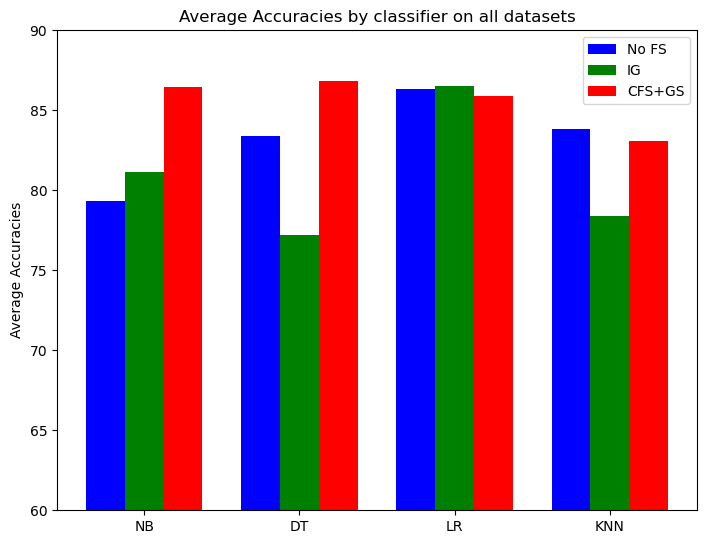

In [33]:
no_fs_col_acc = average_accuracies.iloc[0,:]
ig_col_acc = average_accuracies.iloc[1,:]
gs_col_acc = average_accuracies.iloc[2,:]

fig = plt.figure()

X = np.arange(4)

ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, no_fs_col_acc, color = 'b', width = 0.25)
ax.bar(X + 0.25, ig_col_acc, color = 'g', width = 0.25)
ax.bar(X + 0.50, gs_col_acc, color = 'r', width = 0.25)


ax.set_xticks(ticks = X+0.25, labels = classifiers)
ax.set_ylabel('Average Accuracies')

plt.ylim(60,90)
ax.set_title('Average Accuracies by classifier on all datasets')

ax.legend(average_accuracies.index)


plt.show()

### Computation of the Coefficient of Variation as measure of Stability

The coefficient of variation is another 3x4 dataframe with the FS method as rows and the classifiers as columns. Each element is computed by dividing the standard deviation with the average accuracy (element-wise).

In [34]:
coeffs_variation = {c: (standard_deviations[c]/average_accuracies[c])*100 for c in classifiers}
coeffs_variation = pd.DataFrame(coeffs_variation)

coeffs_variation.to_csv(f'{RESULTS_PATH}/coeffs_variation.csv')

### Bar plots of Coefficients of Variation

With the same code, we have created another plot for the CVs.

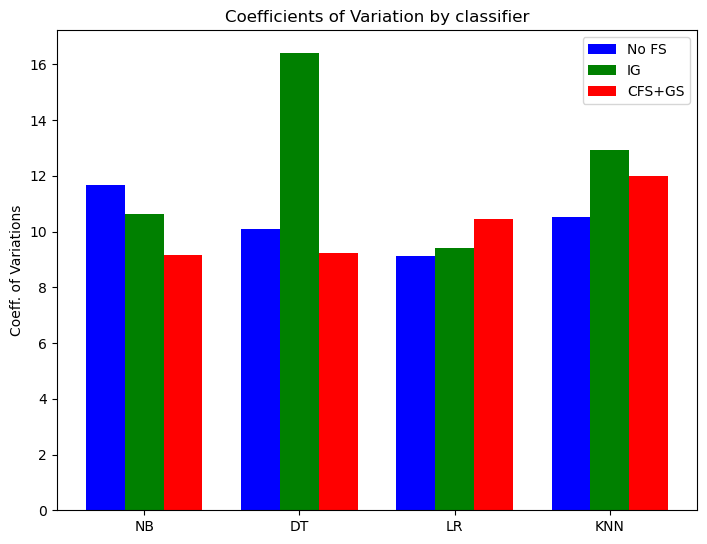

In [35]:
no_fs_col = coeffs_variation.iloc[0,:]
ig_col = coeffs_variation.iloc[1,:]
gs_col = coeffs_variation.iloc[2,:]

fig = plt.figure()

X = np.arange(4)

ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, no_fs_col, color = 'b', width = 0.25)
ax.bar(X + 0.25, ig_col, color = 'g', width = 0.25)
ax.bar(X + 0.50, gs_col, color = 'r', width = 0.25)

ax.set_xticks(ticks = X+0.25, labels = classifiers)
ax.set_ylabel('Coeff. of Variations')

ax.set_title('Coefficients of Variation by classifier')
ax.legend(coeffs_variation.index)


plt.show()

### comparisons with the paper's results

In [36]:
ave_acc_paper = pd.read_csv(f'{RESULTS_PATH}/ave_acc_paper.csv', index_col=0)

ave_var_paper = pd.read_csv(f'{RESULTS_PATH}/ave_var_paper.csv', index_col=0)

ave_training_scores = pd.read_csv(f'{RESULTS_PATH}/ave_tr_scores.csv', index_col=0)

print('\nAverage accuracies:\n')
print(average_accuracies)
print('\nAverage accuracies in the paper:\n')
print(ave_acc_paper)
print('\nAverage variations:\n')
print(average_variations)
print('\nAverage variations in the paper:\n')
print(ave_var_paper)
print('\nAverage training scores:\n')
print(ave_training_scores)


Average accuracies:

               NB         DT         LR        KNN
No FS   79.314388  83.414569  86.358535  83.850482
IG      81.160556  77.211734  86.487732  78.374151
CFS+GS  86.440201  86.823466  85.915152  83.057651

Average accuracies in the paper:

             NB     DT     LR    KNN
No FS     81.14  84.50  85.93  80.54
IG (FRR)  82.84  86.25  86.04  81.67
GS (FSS)  83.46  86.32  86.38  80.54

Average variations:

              NB        DT        LR       KNN
IG      2.561104 -7.495636  0.131447 -6.589242
CFS+GS  9.565959  4.248425 -0.631005 -1.050893

Average variations in the paper:

            NB    DT    LR  KNN
IG (FRR)  2.10  2.06  0.12  1.4
GS (FSS)  2.87  2.16  0.52  0.0

Average training scores:

                 NB          DT         LR         KNN
No FS     79.709748  100.000000  88.334842  100.000000
IG (FRR)  83.190462   99.977038  86.899032   99.977038
GS (FSS)  86.977025   89.066661  88.057705   88.999037
